In [0]:
#importing packages
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [0]:
os.chdir('U:\\More Data')

In [0]:
x=pd.read_excel('LUAD_250_NoDepth.xlsx',index_col=0) 
y=pd.read_excel('survival_LUAD.xlsx')

In [0]:
from sklearn.model_selection import train_test_split
#split data to train, test, validation split (80/20)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [0]:
from sklearn.linear_model import Ridge
ridgeReg=Ridge(alpha= 10)
ridgeReg.fit(X_train,y_train)
y_predval=ridgeReg.predict(X_val)

In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ridgeReg.score(X_val, y_val))

25.99898795635256
1149.0274018757605
33.89730670533812
Variance score: -1.10


In [0]:
# KFOlD
estimator = ridgeReg
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[-1.86263625 -1.16822717]
-1.5154317078338895 0.3472045417008427


In [0]:
# Hyper parameter optimization

tuned_parameters = {'alpha':[0.1,0.5,1.10,20,30,50,100],
                     'fit_intercept':[True,False],
                     'max_iter':[None,1,2,5,10],
                     'random_state':[0,1,42],
                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'tol':[0.001,0.1,0.5]}
ridgeReg=Ridge()
grid=GridSearchCV(ridgeReg,tuned_parameters,scoring='r2',verbose=1)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [0]:
print(grid.best_params_)

{'alpha': 0.1, 'fit_intercept': False, 'max_iter': 5, 'random_state': 0, 'solver': 'sag', 'tol': 0.001}


In [0]:
from sklearn.linear_model import Ridge
ridgeReg=Ridge(alpha= 0.1, fit_intercept= False, max_iter=5, random_state= 0, solver= 'sag', tol= 0.001)
ridgeReg.fit(X_train,y_train)
y_predval=ridgeReg.predict(X_val)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ridgeReg.score(X_val, y_val))

18.160030700539668
702.984284127011
26.513850797781355
Variance score: -0.29


In [0]:
# KFOlD
estimator = ridgeReg
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[0.15351616 0.11437463]
0.13394539578280912 0.019570763684543968


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
ridgeReg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ridgeReg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % ridgeReg.score(X_test, y_test))


20.892798860135883
1368.2405730896962
36.98973605055457
Variance score: -0.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


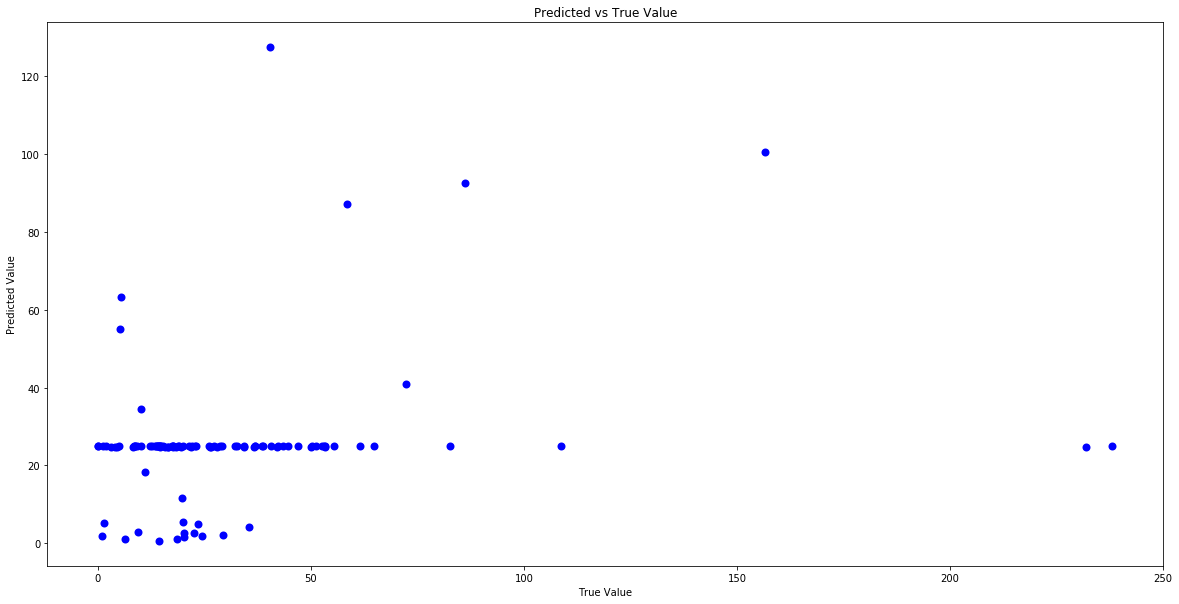

In [0]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()